<a href="https://colab.research.google.com/github/badrinarayanan02/machine_learning/blob/main/2348507_AMLlab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dimensionality Reduction and Classifiers**

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer,load_iris,load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

# **Breast Cancer Dataset**

Loading the breast cancer dataset from sklearn library

In [ ]:
cancer_data = load_breast_cancer()
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

The Wisconsin Breast Cancer Dataset contains 569 breast tissue samples, each of which is described by 30 features. These features include things like the radius of the tumor, the texture of the cells, and the amount of blood supply to the tumor.

In [ ]:
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Clear description of the dataset is obtained by using DESCR

In [ ]:
df_features = pd.DataFrame(cancer_data.data,columns = cancer_data.feature_names)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')


**Inference**

Malignant: Indicates the presence of malignant (cancerous) cells in the breast tissue. This class signifies the cases where the cells are considered harmful or cancerous.

Benign: Indicates the absence of malignant cells, suggesting that the cells appear normal or non-cancerous. This class represents cases where the tumor is non-threatening or not cancerous.

Apply PCA find principal components and project in the lower dimensions

Splitting the data into features and target

In [ ]:
X, y = cancer_data.data, cancer_data.target

Standardize the features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
classifiers = [
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Decision Tree', DecisionTreeClassifier(random_state=42)),
        ('Random Forest', RandomForestClassifier(random_state=42))
  ]

In [ ]:
for clf_name, clf in classifiers:
  print(f"{clf_name}:")
  print("Before Dimensionality Reduction : ")
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  acc_bef_reduction = accuracy_score(y_test,y_pred)
  print(f"Accuracy Score: {acc_bef_reduction:.4f} ")

K-Nearest Neighbors:
Before Dimensionality Reduction : 
Accuracy Score: 0.9591 
Decision Tree:
Before Dimensionality Reduction : 
Accuracy Score: 0.9415 
Random Forest:
Before Dimensionality Reduction : 
Accuracy Score: 0.9708 


**Inference**

These scores represents how well the classifiers performed on the original dataset with its original feature space before reducing the number of dimensions using techniques like PCA or LDA.

Applying PCA

In [ ]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [ ]:
for clf_name, clf in classifiers:
  print(f"{clf_name}:")
  print("After PCA Dimensionality Reduction : ")
  clf.fit(X_train_pca,y_train)
  y_pred = clf.predict(X_test_pca)
  acc_bef_reduction = accuracy_score(y_test,y_pred)
  print(f"Accuracy Score: {acc_bef_reduction:.4f} ")

K-Nearest Neighbors:
After PCA Dimensionality Reduction : 
Accuracy Score: 0.9357 
Decision Tree:
After PCA Dimensionality Reduction : 
Accuracy Score: 0.9298 
Random Forest:
After PCA Dimensionality Reduction : 
Accuracy Score: 0.9532 


**Inference**

The decrease in accuracy after PCA dimensionality reduction might indicate that the reduced feature space might not capture enough information for these classifiers to maintain their original performace.

Even though random forest maintained a relatively higher accuracy compared to KNN and Decision Tree after PCA, it also experienced a slight decrease in accuracy.

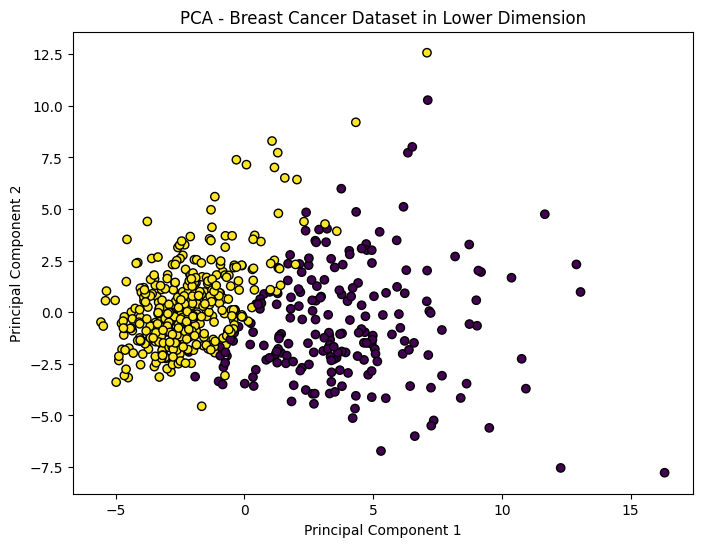

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=cancer_data.target, cmap='viridis',edgecolor='k')
plt.title('PCA - Breast Cancer Dataset in Lower Dimension')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Inference**

The plot shows that the data is clustered into two groups.

PC1 is a weight sum of all the original features. The weights are chosen so that PC1 captures the most variance in the data. PC1 is related to the size and shape of the tumor.

PC2 is uncorrelated with PC1. PC2 is also weighted sum of all the original features. PC2 may be related to the texture of the cells or the amount of blood supply to the tumor.

Performing LDA

The maximum number of components that can be extracted is limited by the formula min(n_features, n_classes - 1)

In the dataset which has 30 features and 2 classes, the maximum number of components that can be extracted using LDA would be (30,2-1) = 1

In [ ]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, cancer_data.target)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [ ]:
for clf_name, clf in classifiers:
  print(f"{clf_name}:")
  print("After LDA Dimensionality Reduction : ")
  clf.fit(X_train_lda,y_train)
  y_pred = clf.predict(X_test_lda)
  acc_bef_reduction = accuracy_score(y_test,y_pred)
  print(f"Accuracy Score: {acc_bef_reduction:.4f} ")
  print("-" * 30)

K-Nearest Neighbors:
After LDA Dimensionality Reduction : 
Accuracy Score: 0.9532 
------------------------------
Decision Tree:
After LDA Dimensionality Reduction : 
Accuracy Score: 0.9532 
------------------------------
Random Forest:
After LDA Dimensionality Reduction : 
Accuracy Score: 0.9532 
------------------------------


**Inference**

All classifiers achieve an accuracy score of 0.9532, suggesting that LDA successfully reduced the feature space to a lower-dimensional representation while still maintaining critical class-discriminatory information.

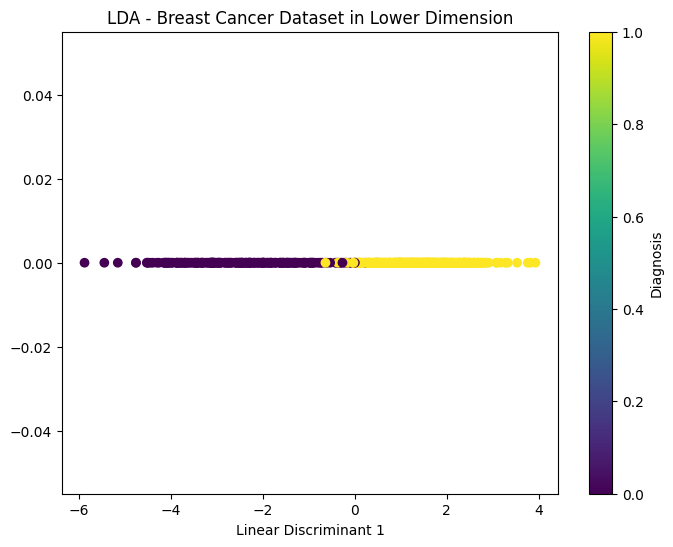

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_lda,[0] * len(X_lda), c = cancer_data.target, cmap='viridis')
plt.title('LDA - Breast Cancer Dataset in Lower Dimension')
plt.xlabel('Linear Discriminant 1')
plt.colorbar(label='Diagnosis')
plt.show()

**Inference**

This indicates that LDA has reduced the data to one dimension that maximizes the separation between the classes.

The overlap of data points suggests that the classes are not perfectly separable in this one dimensional representation. Data points more to the left are likely more indicative of one class("malignant"), right side indicates the other class("benign").

# **Iris Dataset**

In [ ]:
iris_data = load_iris()
print(iris_data.DESCR)

In [ ]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
df_features = pd.DataFrame(iris_data.data,columns = iris_data.feature_names)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Apply PCA find principal components and project in the lower dimensions

Splitting the data into features and target

In [ ]:
X, y = iris_data.data, iris_data.target

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
classifiers = [
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Decision Tree', DecisionTreeClassifier(random_state=42)),
        ('Random Forest', RandomForestClassifier(random_state=42))
  ]


In [ ]:
for clf_name, clf in classifiers:
  print(f"{clf_name}:")
  print("Before Dimensionality Reduction : ")
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  acc_bef_reduction = accuracy_score(y_test,y_pred)
  print(f"Accuracy Score: {acc_bef_reduction:.4f} ")

K-Nearest Neighbors:
Before Dimensionality Reduction : 
Accuracy Score: 1.0000 
Decision Tree:
Before Dimensionality Reduction : 
Accuracy Score: 1.0000 
Random Forest:
Before Dimensionality Reduction : 
Accuracy Score: 1.0000 


Applying PCA

In [ ]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)


In [ ]:
for clf_name, clf in classifiers:
  print(f"{clf_name}:")
  print("After PCA Dimensionality Reduction : ")
  clf.fit(X_train_pca,y_train)
  y_pred = clf.predict(X_test_pca)
  acc_bef_reduction = accuracy_score(y_test,y_pred)
  print(f"Accuracy Score: {acc_bef_reduction:.4f} ")

K-Nearest Neighbors:
After PCA Dimensionality Reduction : 
Accuracy Score: 0.8444 
Decision Tree:
After PCA Dimensionality Reduction : 
Accuracy Score: 0.9111 
Random Forest:
After PCA Dimensionality Reduction : 
Accuracy Score: 0.8889 


**Inference**

The reduction in accuracy scores for all classifiers (KNN,Decision Tree, Random Forest) after PCA dimensionality reduction indicates that the transformation to lower dimensions might have led to the loss of some information essential for classification.

While Decision Tree and Random Forest maintained higher accuracies compared to KNN after PCA, all classifiers experienced a decrease in accuracy when operating in the reduced feature space.

Visualizing iris dataset in lower dimension

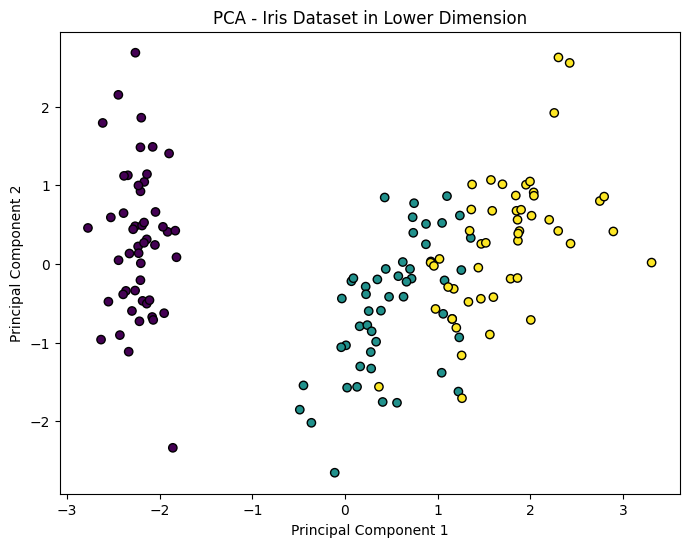

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=iris_data.target, cmap='viridis',edgecolor='k')
plt.title('PCA - Iris Dataset in Lower Dimension')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Inference**

These dimensions capture the most significant variance in the data, allowing visualization of relationships between data points.

Overlaying known class labels on the plot can visually confirm cluster species association.

Applying LDA

In [ ]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, iris_data.target)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [ ]:
for clf_name, clf in classifiers:
  print(f"{clf_name}:")
  print("After LDA Dimensionality Reduction : ")
  clf.fit(X_train_lda,y_train)
  y_pred = clf.predict(X_test_lda)
  acc_bef_reduction = accuracy_score(y_test,y_pred)
  print(f"Accuracy Score: {acc_bef_reduction:.4f} ")
  print("-" * 30)

K-Nearest Neighbors:
After LDA Dimensionality Reduction : 
Accuracy Score: 0.9778 
------------------------------
Decision Tree:
After LDA Dimensionality Reduction : 
Accuracy Score: 0.9556 
------------------------------
Random Forest:
After LDA Dimensionality Reduction : 
Accuracy Score: 0.9556 
------------------------------


**Inference**

Accuracy suggests that the transformed space after LDA contains more discriminative information relevant for KNN classification compared to PCA.

Both decision tree and random forest also show improved accuracy after LDA compared to their scores after PCA.

For iris dataset LDA is better.

Visualizing iris dataset in lower dimension after performing LDA

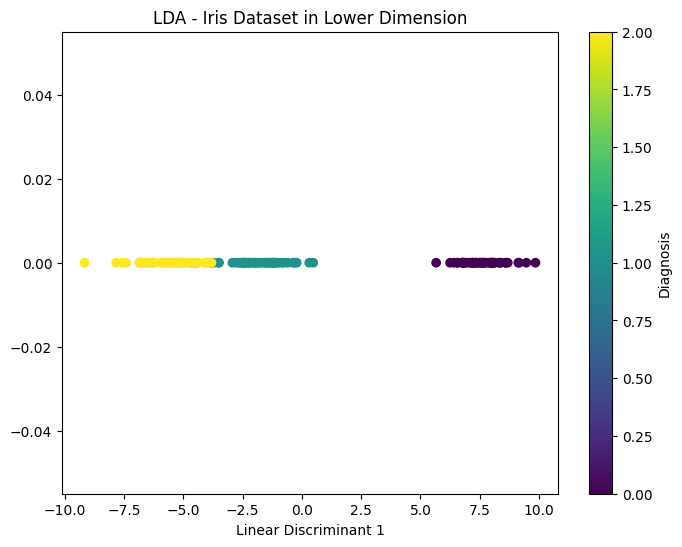

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_lda,[0] * len(X_lda), c = iris_data.target, cmap='viridis')
plt.title('LDA - Iris Dataset in Lower Dimension')
plt.xlabel('Linear Discriminant 1')
plt.colorbar(label='Diagnosis')
plt.show()

**Inference**

The data points are clustered into three distinct groups along this axis, suggesting the presence of three iris species in the dataset.

There's some degree of overlap between the clusters, with most overlap occuring between the clusters on the left and the middle of the plot.

# **Pima Diabetes Dataset**

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Splitting features and target variables

In [ ]:
X = df[['Age','BMI','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction']]
y = df['Outcome']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Standadize the features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Applying PCA

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Creating a dataframe with principal components

In [ ]:
principal_df = pd.DataFrame(data=principal_components, columns=['PC1','PC2'])

Concatenating principal components with target variable

In [ ]:
final_df = pd.concat([principal_df,y],axis=1)

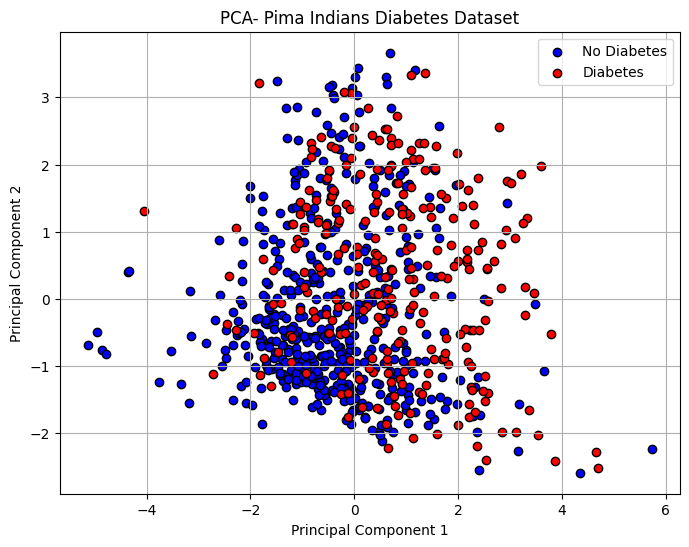

In [ ]:
plt.figure(figsize=(8,6))
targets = [0,1]
colors = ['blue','red']
for target, color in zip(targets,colors):
  indices = final_df['Outcome'] == target
  plt.scatter(final_df.loc[indices,'PC1'],
              final_df.loc[indices,'PC2'],
              c=color,
              label=target,
              edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA- Pima Indians Diabetes Dataset')
plt.legend(['No Diabetes','Diabetes'])
plt.grid(True)
plt.show()

Variance of coefficients

In [ ]:
print("Variance of coefficients for each principal component:")
print(pca.explained_variance_ratio_)

Variance of coefficients for each principal component:
[0.26179749 0.21640127]


**Inference**

PC1 retains more information from the original dataset than PC2.

Applying LDA

In [ ]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled,y)
X_train_lda = lda.fit_transform(X_train_scaled,y_train)
X_test_lda = lda.transform(X_test_scaled)

In [ ]:
lda_df = pd.DataFrame(data=X_lda,columns=['LD1'])

In [ ]:
final_df = pd.concat([lda_df,y],axis=1)
print(final_df)

          LD1  Outcome
0    1.380247        1
1   -1.564524        0
2    1.766185        1
3   -1.690588        0
4    2.207268        1
..        ...      ...
763  0.112889        0
764  0.044506        0
765 -0.484970        0
766 -0.013594        1
767 -1.280089        0

[768 rows x 2 columns]


Visualizing diabetes dataset after performing LDA

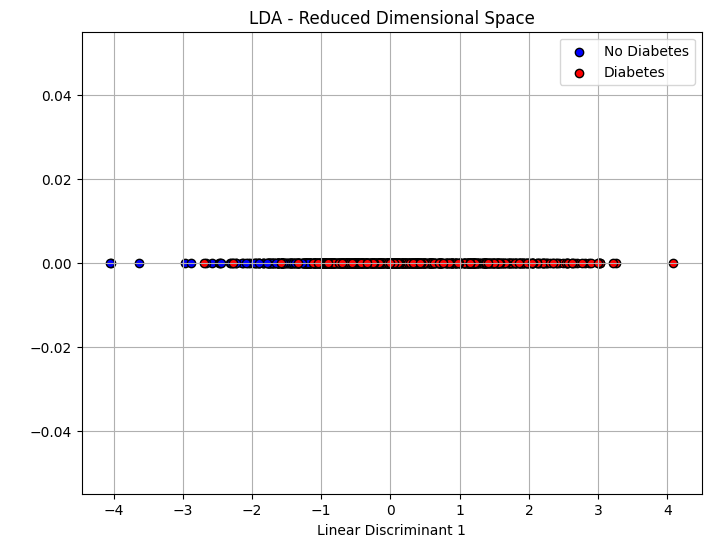

In [ ]:
plt.figure(figsize=(8, 6))
targets = [0, 1]
colors = ['blue', 'red']
for target, color in zip(targets, colors):
    indices_to_keep = final_df['Outcome'] == target
    plt.scatter(final_df.loc[indices_to_keep, 'LD1'],
                [0] * sum(indices_to_keep),
                c=color,
                label=target,
                edgecolor='k')
plt.xlabel('Linear Discriminant 1')
plt.ylabel(' ')
plt.title('LDA - Reduced Dimensional Space')
plt.legend(['No Diabetes', 'Diabetes'])
plt.grid(True)
plt.show()

Initializing the classifiers

In [ ]:
knn = KNeighborsClassifier()
random_forest = RandomForestClassifier(random_state = 42)
decision_tree = DecisionTreeClassifier(random_state = 42)

In [ ]:
knn.fit(X_train_pca, y_train)
knn_pred_pca = knn.predict(X_test_pca)
accuracy_knn_pca = accuracy_score(y_test, knn_pred_pca)
print(f"KNN after PCA - Accuracy Score: {accuracy_knn_pca:.4f}")

random_forest.fit(X_train_pca, y_train)
rf_pred_pca = random_forest.predict(X_test_pca)
accuracy_rf_pca = accuracy_score(y_test, rf_pred_pca)
print(f"Random Forest after PCA - Accuracy Score: {accuracy_rf_pca:.4f}")

decision_tree.fit(X_train_pca, y_train)
dt_pred_pca = decision_tree.predict(X_test_pca)
accuracy_dt_pca = accuracy_score(y_test, dt_pred_pca)
print(f"Decision Tree after PCA - Accuracy Score: {accuracy_dt_pca:.4f}")

KNN after PCA - Accuracy Score: 0.6429
Random Forest after PCA - Accuracy Score: 0.6688
Decision Tree after PCA - Accuracy Score: 0.6299


**Inference**

These are the accuracy scores of the KNN, Random Forest and Decision Tree algorithm after performing principle component analysis.

In [ ]:
knn.fit(X_train_lda, y_train)
knn_pred_lda = knn.predict(X_test_lda)
accuracy_knn_lda = accuracy_score(y_test, knn_pred_lda)
print(f"KNN after LDA - Accuracy Score: {accuracy_knn_lda:.4f}")

random_forest.fit(X_train_lda, y_train)
rf_pred_lda = random_forest.predict(X_test_lda)
accuracy_rf_lda = accuracy_score(y_test, rf_pred_lda)
print(f"Random Forest after LDA - Accuracy Score: {accuracy_rf_lda:.4f}")

decision_tree.fit(X_train_lda, y_train)
dt_pred_lda = decision_tree.predict(X_test_lda)
accuracy_dt_lda = accuracy_score(y_test, dt_pred_lda)
print(f"Decision Tree after LDA - Accuracy Score: {accuracy_dt_lda:.4f}")

KNN after LDA - Accuracy Score: 0.7273
Random Forest after LDA - Accuracy Score: 0.7597
Decision Tree after LDA - Accuracy Score: 0.7597


**Inference**

These are the accuracy scores of KNN, Random Forest and Decision Tree after performing Linear Discriminant Analysis.

LDA is better than PCA for pima diabetes dataset.